In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [197]:
df = pd.read_csv('../data/raw/realtor-data.zip.csv')


# EDA 

### 1. Basic Data Info



realtor-data.csv (2,226,382 entries)


brokered by (categorically encoded agency/broker)


status (Housing status - a. ready for sale or b. ready to build)

price (Housing price, it is either the current listing price or recently sold price if the house is sold recently)


bed (# of beds)


bath (# of bathrooms)


acre_lot (Property / Land size in acres)


street (categorically encoded street address)


city (city name)


state (state name)


zip_code (postal code of the area)


house_size (house area/size/living space in square feet)


prev_sold_date (Previously sold date)

In [137]:
print(f"Shape of the dataset: {df.shape}")
print(f"\n The first 5 rows of the dataset {df.head()}")


Shape of the dataset: (2226382, 13)

 The first 5 rows of the dataset    brokered_by    status     price  bed  bath  acre_lot     street  \
0     103378.0  for_sale  105000.0  3.0   2.0      0.12  1962661.0   
1      52707.0  for_sale   80000.0  4.0   2.0      0.08  1902874.0   
2     103379.0  for_sale   67000.0  2.0   1.0      0.15  1404990.0   
3      31239.0  for_sale  145000.0  4.0   2.0      0.10  1947675.0   
4      34632.0  for_sale   65000.0  6.0   2.0      0.05   331151.0   

         city        state  zip_code  house_size prev_sold_date  lot_sqft  
0    Adjuntas  Puerto Rico     601.0       920.0            NaN    5227.2  
1    Adjuntas  Puerto Rico     601.0      1527.0            NaN    3484.8  
2  Juana Diaz  Puerto Rico     795.0       748.0            NaN    6534.0  
3       Ponce  Puerto Rico     731.0      1800.0            NaN    4356.0  
4    Mayaguez  Puerto Rico     680.0         NaN            NaN    2178.0  


In [193]:
# Missing values
df.isna().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

### 2. Descriptive Statistics

In [21]:
print(f"Some info about the dataset: {df.info()}")
print(f"\n Description {df.describe()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB
Some info about the dataset: None

 Description         brokered_by         price           bed          bath      acre_lot  \
count  2.221849e+06  2.224841e+06  1.745065e+06  1.714611e+06  1.900793e+06   
mean   5.293989e+04  5.241955e+05  3.275841e+00  2.496440e+00  1.522303e+01   
std    3.064275e+04  2.138893e+06  1.567274e+00  1.652573e+00  7.628238e+02   
min    0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  

In [195]:
# Looking at price

print(f"Average house price {df['price'].mean()}")
print(f"Median house price {df['price'].median()}")
print(f"Minimum price {df['price'].min()}")
print(f"Maximum price {df['price'].max()}")



Average house price 524195.5192906774
Median house price 325000.0
Minimum price 0.0
Maximum price 2147483600.0


In [198]:
# change acre to lot size
df['lot_sqft'] = df['acre_lot'] * 43560
# drop columns: brokered_by and street - Irrelavant
df.drop(columns= ['street', 'brokered_by', 'acre_lot'], inplace=True)
# Drop rows where price or state is missing
df = df.dropna(subset=['price', 'state'])
print(df.isna().sum())
df.head()


status                 0
price                  0
bed               480859
bath              510984
city                1404
state                  0
zip_code             296
house_size        567872
prev_sold_date    733248
lot_sqft          325134
dtype: int64


,status,price,bed,bath,city,state,zip_code,house_size,prev_sold_date,lot_sqft
0,for_sale,105000.0,3.0,2.0,Adjuntas,Puerto Rico,601.0,920.0,NaN,5227.2
1,for_sale,80000.0,4.0,2.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN,3484.8
2,for_sale,67000.0,2.0,1.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN,6534.0
3,for_sale,145000.0,4.0,2.0,Ponce,Puerto Rico,731.0,1800.0,NaN,4356.0
4,for_sale,65000.0,6.0,2.0,Mayaguez,Puerto Rico,680.0,NaN,NaN,2178.0


### Deal with Missing values first

In [200]:
df.columns

Index(['status', 'price', 'bed', 'bath', 'city', 'state', 'zip_code',
       'house_size', 'prev_sold_date', 'lot_sqft'],
      dtype='object')

In [201]:
columns = ['status', 'price', 'bed', 'bath',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date',
       'lot_sqft']
for i in columns:
    print(round(df[i].isna().sum() / df[i].shape[0] * 100, 2))

0.0
0.0
21.61
22.97
0.06
0.0
0.01
25.52
32.96
14.61


In [202]:
def missing_percent(df, columns):
    """
    Calculate missng values in percent for each specified column

    Args:
        df: Dataframe - input DataFrame
        columns list - List of columns to check
    returns:
        dict: Dictionary with column name as keys and missing percentage
    """
    missing_percentage = {}
    
    for col in columns:
        percent = (df[col].isna().sum() / len(df)) * 100
        missing_percentage[col] = round((percent), 2)
        
    return missing_percentage

In [204]:
cols_to_check = ['status', 'price', 'bed', 'bath',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date',
       'lot_sqft']

missing_values = missing_percent(df, cols_to_check)
missing_values

{'status': np.float64(0.0),
 'price': np.float64(0.0),
 'bed': np.float64(21.61),
 'bath': np.float64(22.97),
 'city': np.float64(0.06),
 'state': np.float64(0.0),
 'zip_code': np.float64(0.01),
 'house_size': np.float64(25.52),
 'prev_sold_date': np.float64(32.96),
 'lot_sqft': np.float64(14.61)}

In [205]:
for col, pct in missing_values.items():
    print(f"{col}: {pct}% missing")

status: 0.0% missing
price: 0.0% missing
bed: 21.61% missing
bath: 22.97% missing
city: 0.06% missing
state: 0.0% missing
zip_code: 0.01% missing
house_size: 25.52% missing
prev_sold_date: 32.96% missing
lot_sqft: 14.61% missing


In [206]:
# Dealing with missing values
def handle_missing_values(df, cols_to_check):
    df = df.copy()
    missing_values = missing_percent(df, cols_to_check)
    for col, pct in missing_values.items():
        if pct > 30:
            print(f"Dropping column '{col}' with {pct}% missing data.")
            df.drop(columns = [col], inplace=True)
        elif 0 < pct < 30:
            if df[col].dtype in ['float64', 'int64']:
                print(f"Filling numeric column {col} with median.")
                df[col].fillna(df[col].median, inplace=True)
            else:
                print("Filling Categorical column '{col}' with mode.")
                df[col].fillna(df[col].mode()[0], inplace=True)
    return df
        

    

In [207]:
df.columns

Index(['status', 'price', 'bed', 'bath', 'city', 'state', 'zip_code',
       'house_size', 'prev_sold_date', 'lot_sqft'],
      dtype='object')

In [208]:
cols_to_check = ['status', 'price', 'bed', 'bath',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date',
       'lot_sqft']
clean_data=handle_missing_values(df, cols_to_check)


Filling numeric column bed with median.
Filling numeric column bath with median.
Filling Categorical column '{col}' with mode.


/var/folders/h4/4f1dd3392y134gkcvw6sfk1r0000gn/T/ipykernel_17063/4256703469.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.median of 0          3.0
1          4.0
2          2.0
3          4.0
4          6.0
          ... 
2226377    4.0
2226378    3.0
2226379    6.0
2226380    2.0
2226381    5.0
Name: bed, Length: 2224833, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[col].fillna(df[col].median, inplace=True)
/var/folders/h4/4f1dd3392y134gkcvw6sfk1r0000gn/T/ipykernel_17063/4256703469.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.median of 0          2.0
1          2.0
2          1.0
3          2.0
4          2.0
          ... 
2226377    2.0
2226378    2.0
2226379    3.0
2226380    1.0
2226381    3.0
Nam

Filling numeric column zip_code with median.
Filling numeric column house_size with median.
Dropping column 'prev_sold_date' with 32.96% missing data.


/var/folders/h4/4f1dd3392y134gkcvw6sfk1r0000gn/T/ipykernel_17063/4256703469.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.median of 0            601.0
1            601.0
2            795.0
3            731.0
4            680.0
            ...   
2226377    99354.0
2226378    99354.0
2226379    99354.0
2226380    99354.0
2226381    99354.0
Name: zip_code, Length: 2224833, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[col].fillna(df[col].median, inplace=True)
/var/folders/h4/4f1dd3392y134gkcvw6sfk1r0000gn/T/ipykernel_17063/4256703469.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.median of 0           920.0
1          1527.0
2           748.0
3          1800.0
4             NaN
            ...  
2226377    

Filling numeric column lot_sqft with median.


/var/folders/h4/4f1dd3392y134gkcvw6sfk1r0000gn/T/ipykernel_17063/4256703469.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.median of 0           5227.2
1           3484.8
2           6534.0
3           4356.0
4           2178.0
            ...   
2226377    14374.8
2226378     4356.0
2226379    21780.0
2226380     3920.4
2226381    13503.6
Name: lot_sqft, Length: 2224833, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[col].fillna(df[col].median, inplace=True)


In [211]:
print(df.shape)

(2224833, 10)


In [210]:
clean_data.isna().sum()

status        0
price         0
bed           0
bath          0
city          0
state         0
zip_code      0
house_size    0
lot_sqft      0
dtype: int64

### Outliers

Mainly for numeric values

In [215]:
df['price'].min()

np.float64(0.0)

In [216]:
df[(df['price'] <= 10000)]

,status,price,bed,bath,city,state,zip_code,house_size,prev_sold_date,lot_sqft
4105,for_sale,10000.0,NaN,NaN,Florida,Massachusetts,1247.0,NaN,NaN,20037.6
4107,for_sale,10000.0,NaN,NaN,Florida,Massachusetts,1247.0,NaN,NaN,13068.0
4108,for_sale,9900.0,NaN,NaN,Florida,Massachusetts,1247.0,NaN,NaN,29185.2
4123,for_sale,10000.0,NaN,NaN,Becket,Massachusetts,1223.0,NaN,NaN,27007.2
4162,for_sale,9500.0,NaN,NaN,Becket,Massachusetts,1223.0,NaN,NaN,12196.8
...,...,...,...,...,...,...,...,...,...,...
2220629,sold,8500.0,NaN,NaN,Ephrata,Washington,98823.0,NaN,2021-11-19,55321.2
2220767,sold,7500.0,NaN,NaN,Ephrata,Washington,98823.0,NaN,2022-03-08,57063.6
2220813,sold,10000.0,NaN,NaN,Okanogan,Washington,98840.0,NaN,2022-04-22,10890.0
2221007,sold,1695.0,3.0,4.0,Leavenworth,Washington,98826.0,3910.0,2022-01-25,43560.0


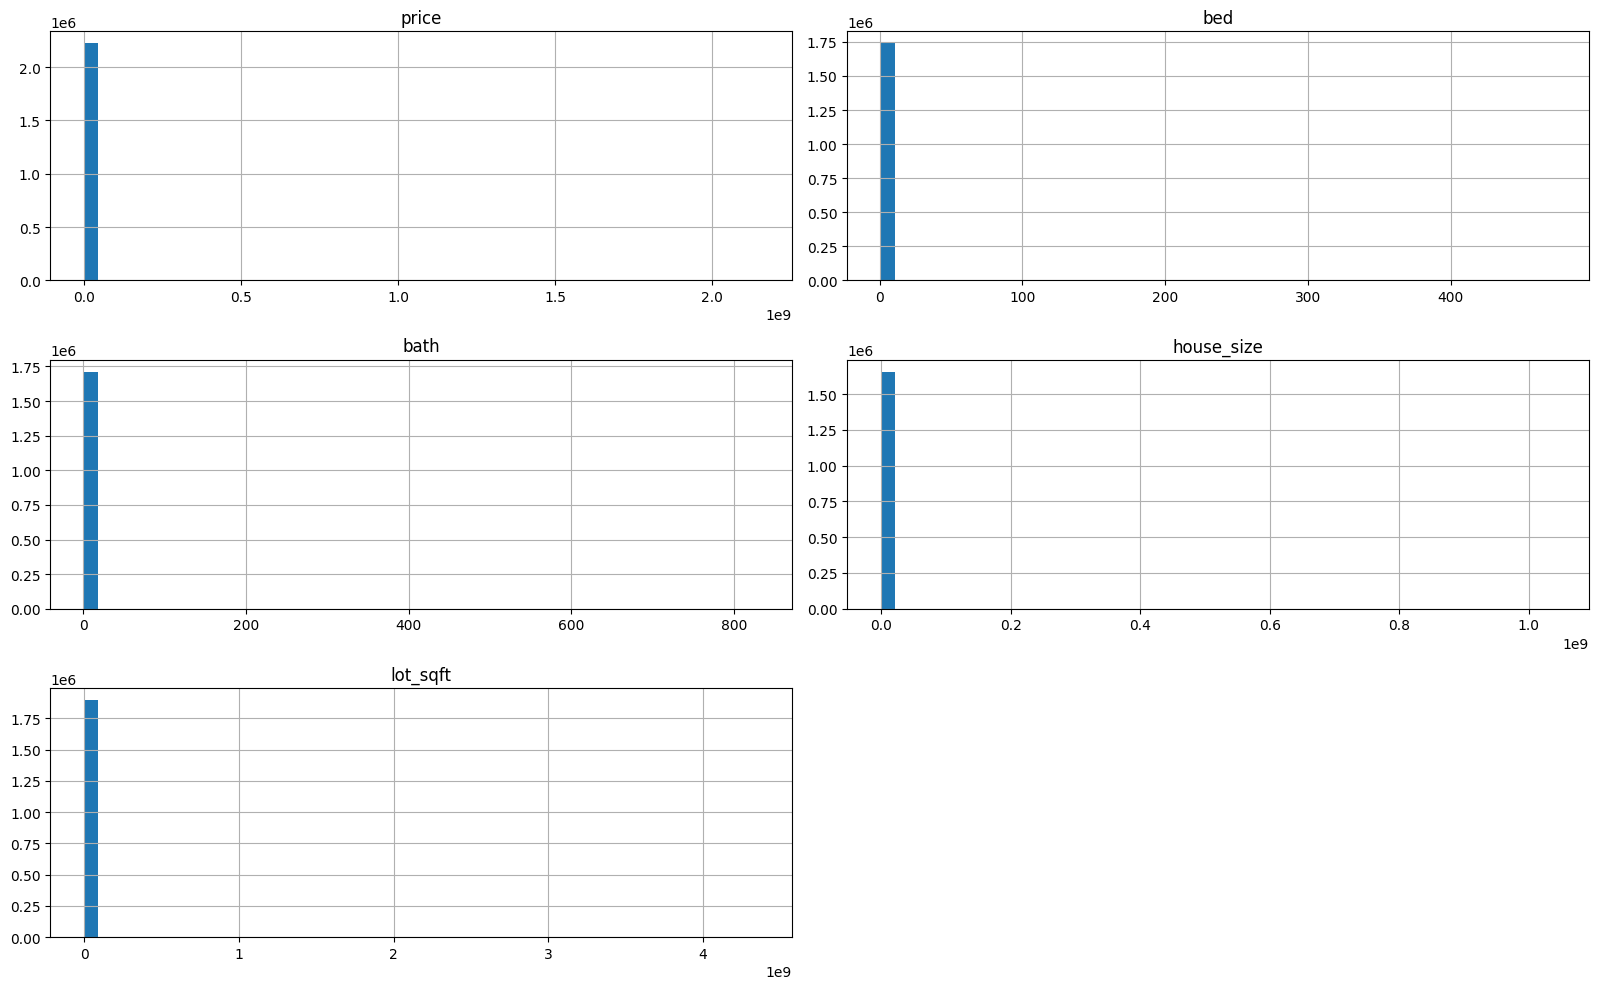

In [218]:
df[['price', 'bed', 'bath', 'house_size', 'lot_sqft']].hist(bins=50,
                figsize=(16, 10))
plt.tight_layout()
plt.show()

In [236]:
df.columns

Index(['status', 'price', 'bed', 'bath', 'city', 'state', 'zip_code',
       'house_size', 'prev_sold_date', 'lot_sqft'],
      dtype='object')

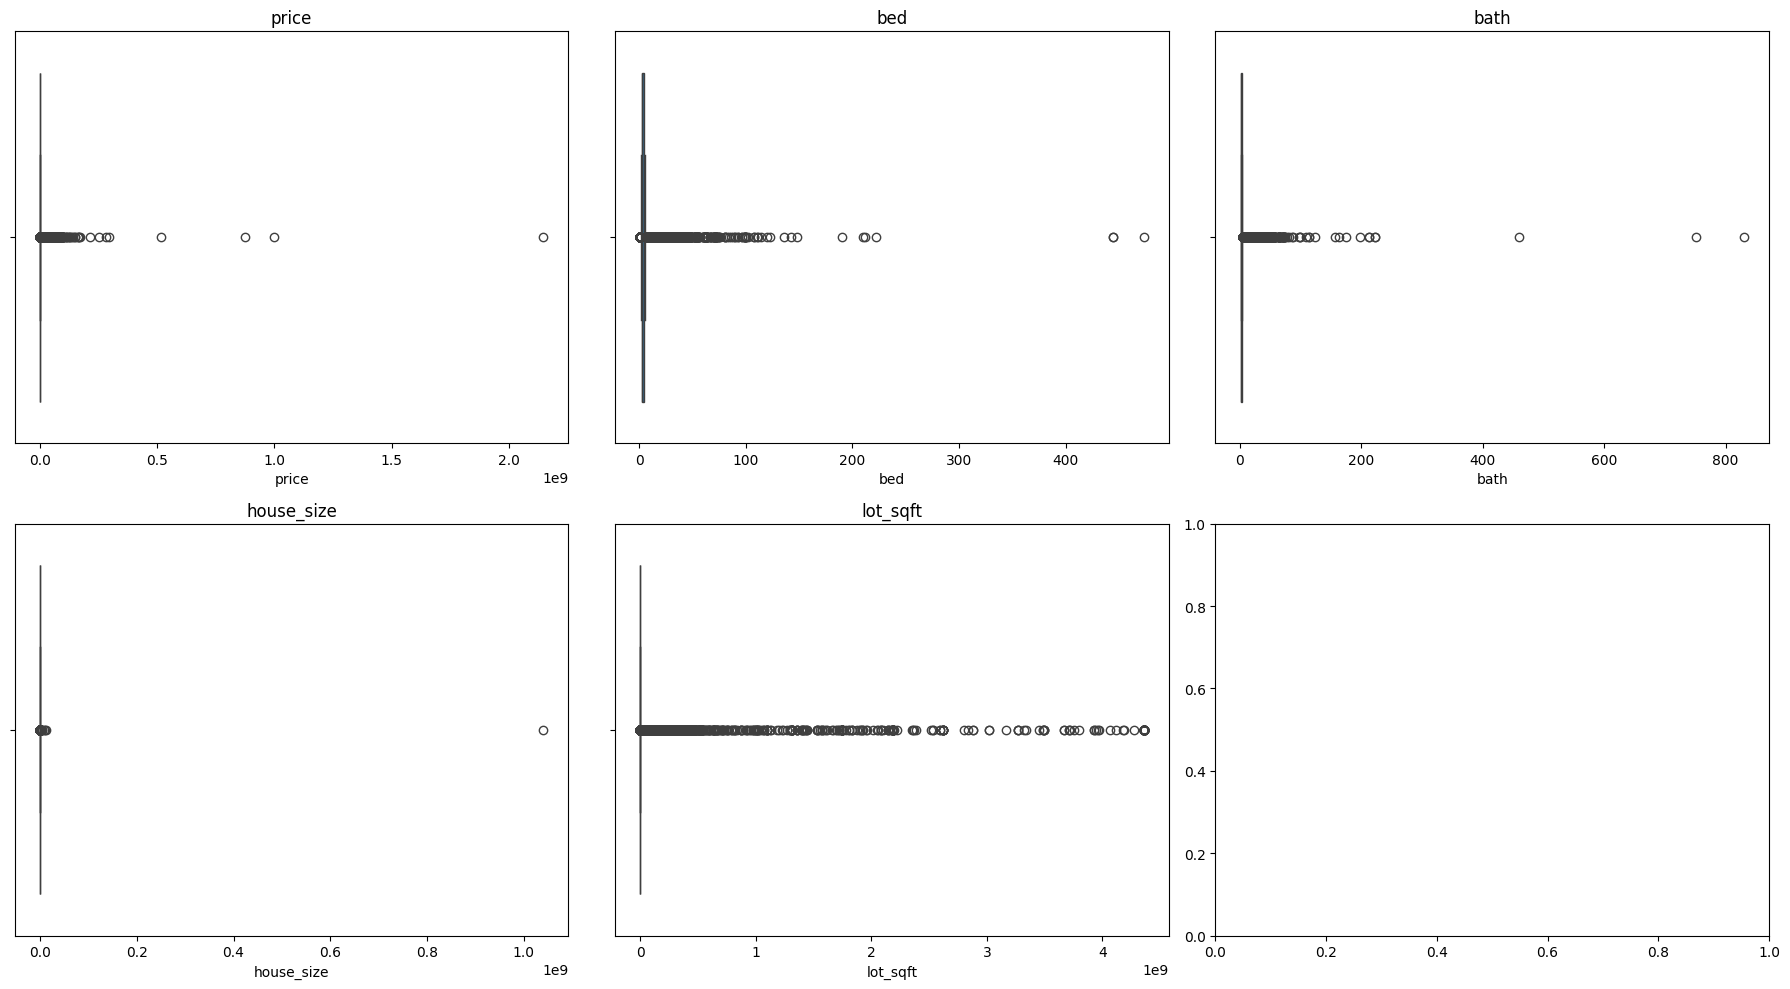

In [237]:
# Select columns for outliers
df_for_outliers=df[['price', 'bed', 'bath', 'house_size', 'lot_sqft']]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (18, 10))

axes = axes.flatten()

for idx, col in enumerate(df_for_outliers.columns):
    sns.boxplot(x=df_for_outliers[col], ax=axes[idx])
    axes[idx].set_title(col)
    
plt.tight_layout()
plt.show()

In [242]:
# Double clicking in each of the columns to see the extreme points - outliers
#Price - outliers
print("Price")
print("Price", df[df['price'] > 10000000].shape[0])  # about 4000 rows with price over 10 million
print(df[df['price'] < 10000].shape[0])

# Bed
print("\n Bed")
print(df[df['bed'] > 10].shape[0]) 
print(df[df['bed'] < 1].shape[0])

# Bath
print("\n bath")
print(df[df['bath'] > 10].shape[0]) 
print(df[df['bath'] < 1].shape[0])

# house_size sqft
print("\n house_size")
print(df[df['house_size'] > 15000].shape[0]) 
print(df[df['house_size'] < 100].shape[0]) 



# lot_sqft
print("\n lot_sqft")
print(df[df['lot_sqft'] > 1000000].shape[0]) 
print(df[df['lot_sqft'] < 100].shape[0])




Price
Price 3996
19270

 Bed
3728
0

 bath
2300
0

 house_size
1529
1

 lot_sqft
67954
2225


In [243]:
# Drop rows with crazy values
df_cleaned = df[
    (df['price'] >= 10000) & (df['price'] <= 10000000) &
    (df['bed'] <= 10) &
    (df['bath'] <= 10) &
    (df['house_size'] >= 100) & (df['house_size'] <= 15000) &
    (df['lot_sqft'] >= 100) & (df['lot_sqft'] <= 1000000)
]
df_cleaned.head()

,status,price,bed,bath,city,state,zip_code,house_size,prev_sold_date,lot_sqft
0,for_sale,105000.0,3.0,2.0,Adjuntas,Puerto Rico,601.0,920.0,NaN,5227.2
1,for_sale,80000.0,4.0,2.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN,3484.8
2,for_sale,67000.0,2.0,1.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN,6534.0
3,for_sale,145000.0,4.0,2.0,Ponce,Puerto Rico,731.0,1800.0,NaN,4356.0
5,for_sale,179000.0,4.0,3.0,San Sebastian,Puerto Rico,612.0,2520.0,NaN,20037.6


In [244]:
df_cleaned.shape

(1335704, 10)

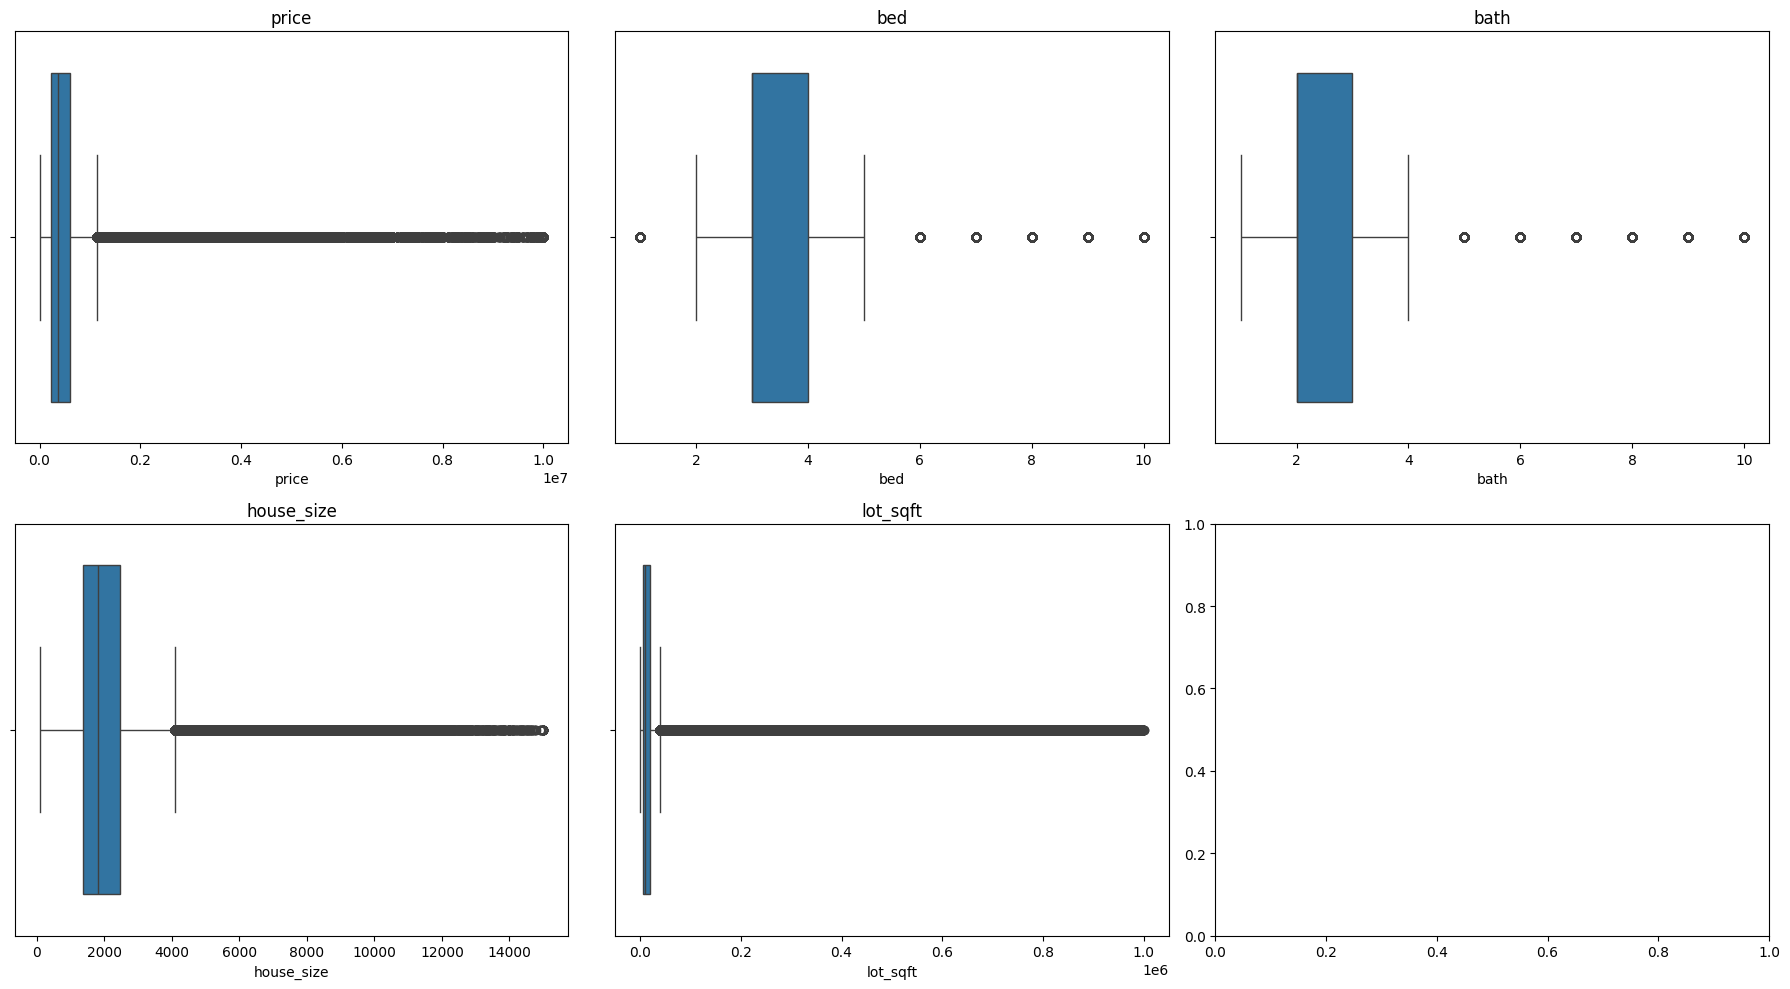

In [245]:
# Select columns for outliers - replottig after fixing the outliers
df_for_outliers=df_cleaned[['price', 'bed', 'bath', 'house_size', 'lot_sqft']]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (18, 10))

axes = axes.flatten()

for idx, col in enumerate(df_for_outliers.columns):
    sns.boxplot(x=df_for_outliers[col], ax=axes[idx])
    axes[idx].set_title(col)
    
plt.tight_layout()
plt.show()